# 1. 데이터 탐색

## 1.1 환경 설정 및 데이터 생성

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('c://chwweww/dss-toyota/data/train.csv')

In [3]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.0,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,724.867517,10738.358194,56.041217,5.480864,1999.623160,68177.927380,101.479882,0.669284,0.056919,1579.582924,4.044161,4.0,5.028459,86.405299,1072.262022,0.403337,0.887144,3.810599,0.813543,0.969578,0.717370,0.504416,0.059863,0.283611,0.226693,0.585868,0.567223,0.974485,0.142296,0.261040,0.312071,0.771344,0.196271,0.142296,0.002944,0.278705
std,415.043138,3614.987568,18.615283,3.304515,1.548589,37966.031948,14.811333,0.470702,0.231801,488.566949,0.954265,0.0,0.166363,39.276282,51.356826,0.490808,0.316572,2.925809,0.389667,0.171830,0.450499,0.500226,0.237349,0.450972,0.418898,0.492813,0.495704,0.157761,0.349525,0.439417,0.463566,0.420173,0.397371,0.349525,0.054206,0.448582
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,4.0,5.000000,19.000000,1000.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,363.000000,8400.000000,44.000000,3.000000,1998.000000,41567.500000,86.000000,0.000000,0.000000,1400.000000,3.000000,4.0,5.000000,69.000000,1040.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,732.000000,9850.000000,61.000000,5.000000,1999.000000,62280.000000,110.000000,1.000000,0.000000,1600.000000,4.000000,4.0,5.000000,85.000000,1070.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1081.500000,11950.000000,70.000000,8.000000,2001.000000,86467.500000,110.000000,1.000000,0.000000,1600.000000,5.000000,4.0,5.000000,85.000000,1085.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1442.000000,31000.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,5.000000,4.0,6.000000,283.000000,1615.000000,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
np.shape(df)

(1019, 39)

## 1.2 독립 변수(x) 및 종속 변수(y) 분리

In [5]:
df_x = df.iloc[:, 3:]
df_x.head(5)

,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0
1,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0
2,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,0
3,25,8,2002,31461,Petrol,192,0,Silver,0,1800,3,4,6,100,1185,1,1,12,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,0,0,0
4,25,8,2002,32189,Petrol,192,0,Red,0,1800,3,4,6,100,1185,1,1,3,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,0,0


In [6]:
np.shape(df_x)

(1019, 36)

In [7]:
df_y = df.iloc[:, :3]
df_y.head(5)

,Id,Model,Price
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600


In [8]:
np.shape(df_y)

(1019, 3)

### 1.2.1 Target 종속 변수 'Price' 분포

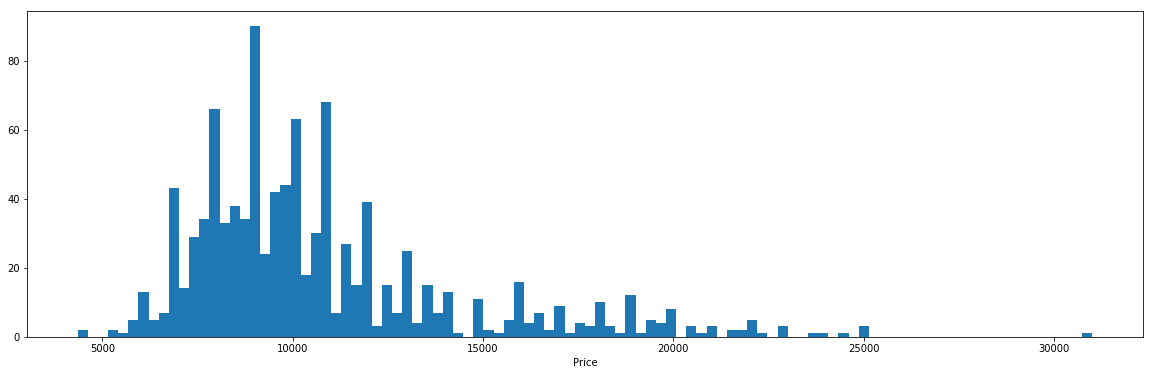

In [9]:
fig = plt.figure(figsize=(20, 6))
plt.hist(df_y.Price, bins=100)
plt.xlabel('Price')

### 1.2.2 독립변수 'x' 분포

In [10]:
cols_df_x = list(df_x.columns)

cols_df_x.remove('Fuel_Type')
cols_df_x.remove('Color')
print(cols_df_x)

['Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors', 'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']


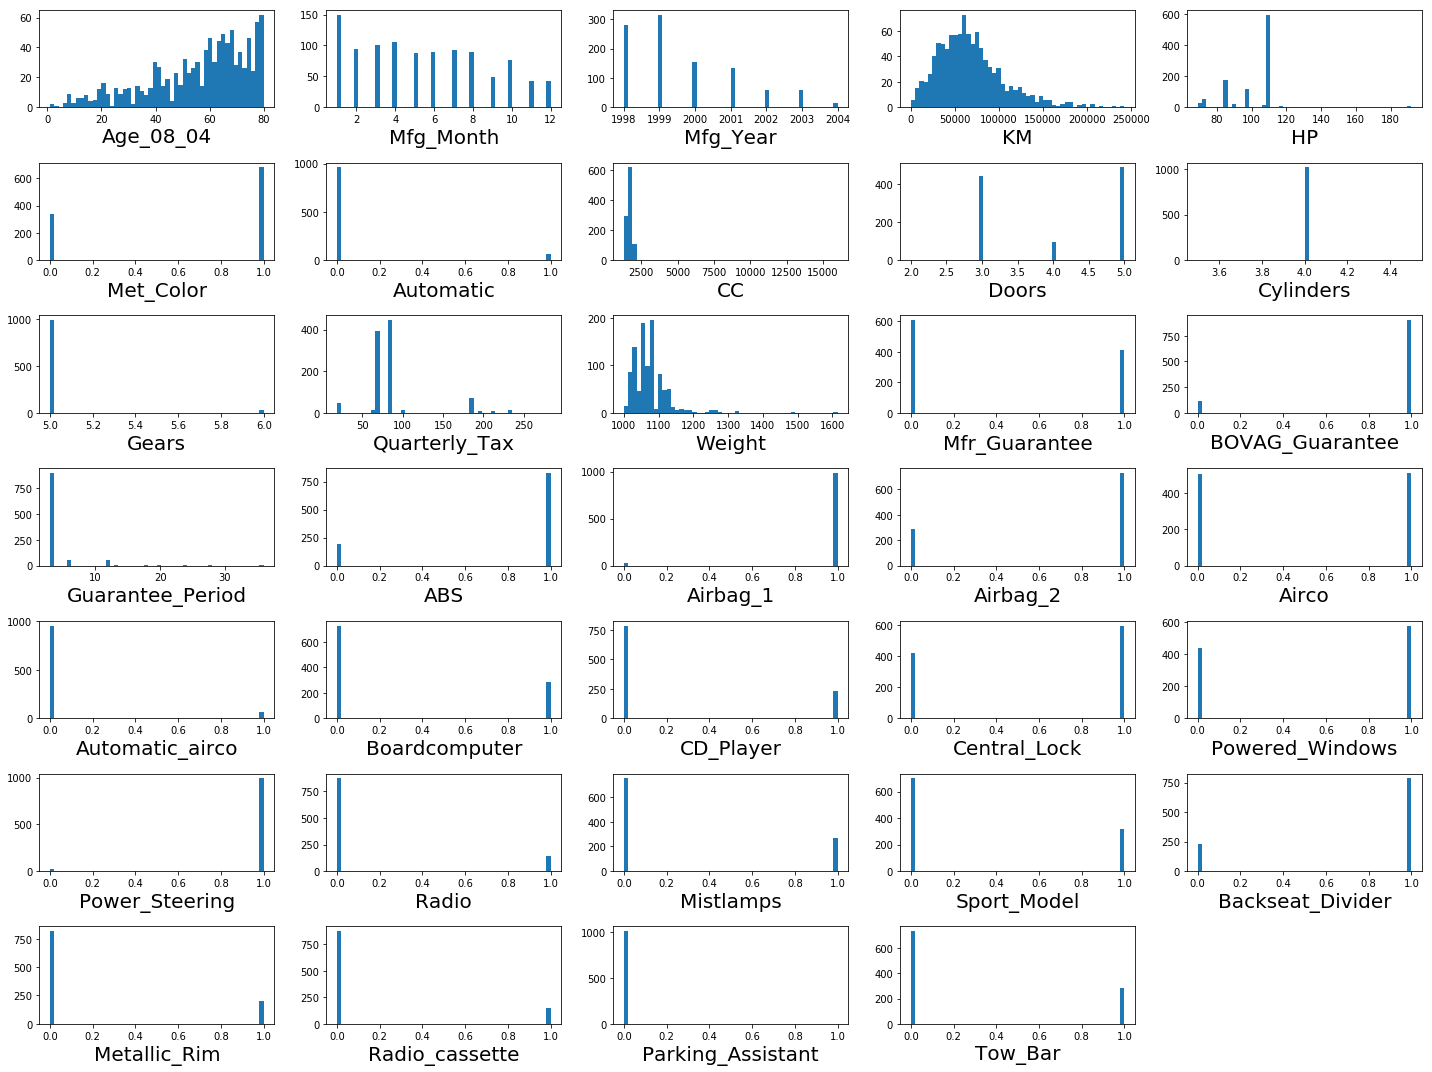

In [11]:
fig = plt.figure(figsize=(20, 15))
for i in range(0,34):
    plt.subplot(7, 5, i+1)
    plt.hist(df_x[cols_df_x[i]], bins=50)
    plt.xlabel(cols_df_x[i], fontsize = 20)
plt.tight_layout()

## 1.3 독립 변수(x) 의 실수값 및 카테고리값 분류

In [12]:
cols_real = ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']

cols_cat = ['Mfg_Month', 'Mfg_Year','Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee',
               'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'CC', 'Doors', 'Cylinders', 'Gears', 
               'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 
               'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
               'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [13]:
np.shape(cols_real), np.shape(cols_cat)

((6,), (30,))

### 1.3.1 실수값 변수 데이터 탐색

In [14]:
for i in range(0, len(cols_real), 3):
    print("df_x{}".format(cols_real[i: i+3]))

df_x['Age_08_04', 'KM', 'HP']
df_x['Quarterly_Tax', 'Weight', 'Guarantee_Period']


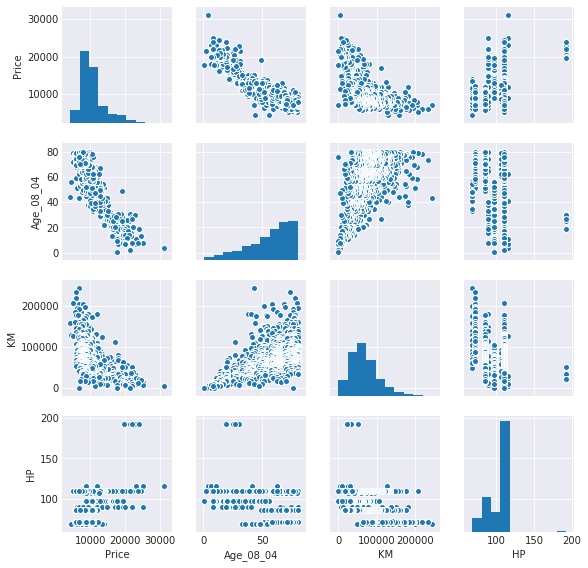

In [15]:
with plt.style.context(('seaborn-darkgrid')):
    sns_plot = sns.pairplot(pd.concat([df_y.Price, df_x[cols_real[:3]]], axis=1) ,size = 2)

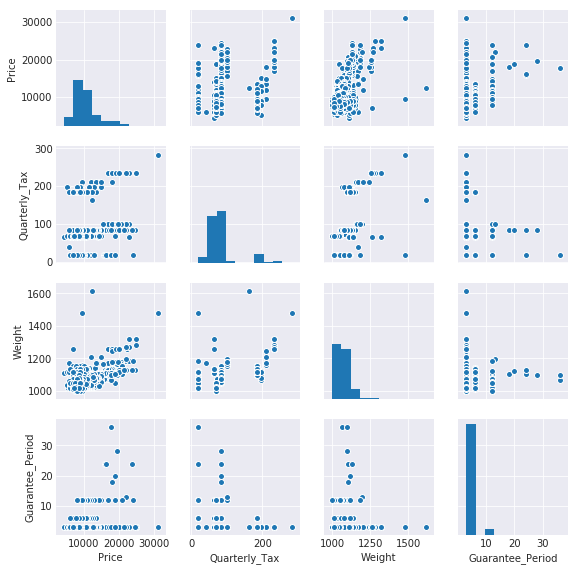

In [16]:
with plt.style.context(('seaborn-darkgrid')):
    sns_plot = sns.pairplot(pd.concat([df_y.Price, df_x[cols_real[3:6]]], axis=1) ,size=2)

### 1.3.2 카테고리 변수 데이터 탐색

In [17]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-dark')):
        f, axes = plt.subplots(figsize=(15, 6), sharey=True)        
        sns.boxplot(x=df_x[feature], y=df_y['Price'], linewidth=2, palette="Set2", ax = axes)


In [18]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-darkgrid')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = cols_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=df_x[cols_cat[start_idx + num]], y=df_y['Price'], palette="Set2", ax=ax)
            except:
                pass

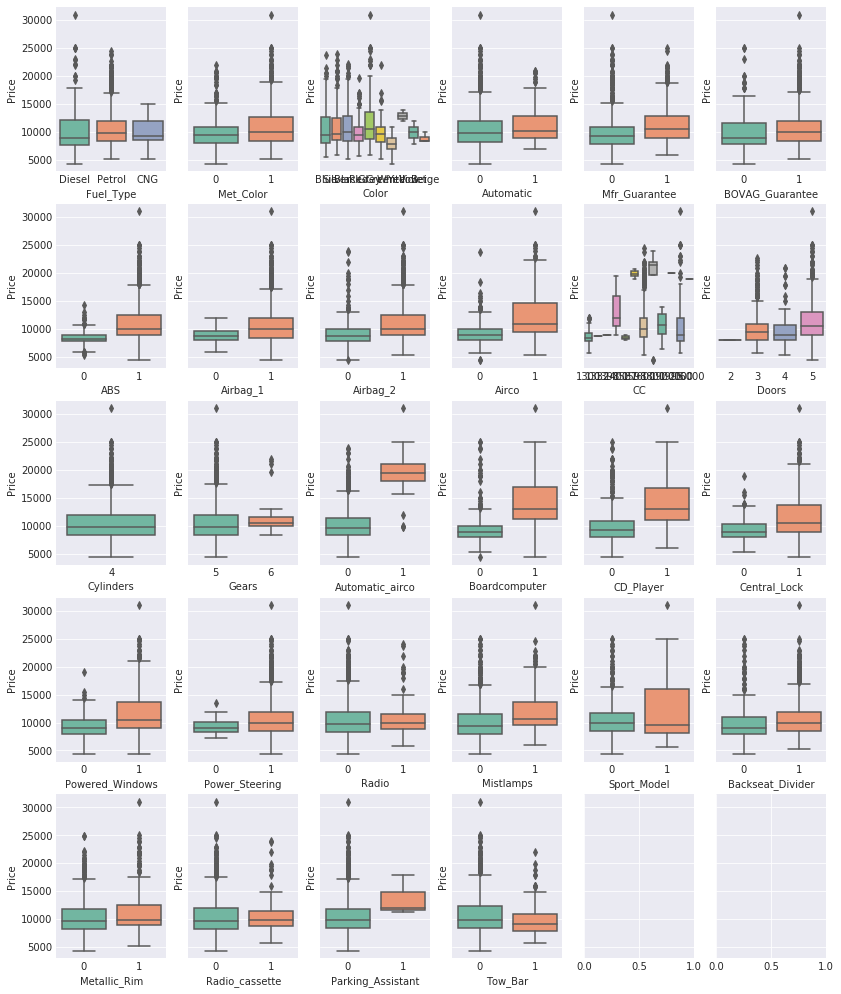

In [19]:
display_multi_boxplots('Fuel_Type', 5, 6)

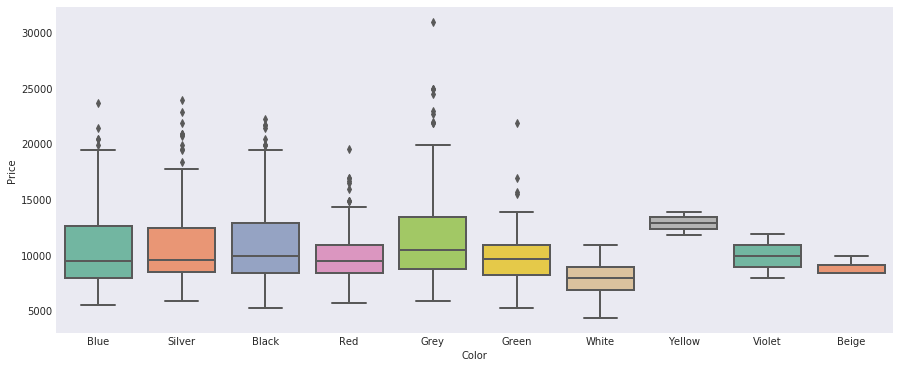

In [20]:
display_boxplot('Color')

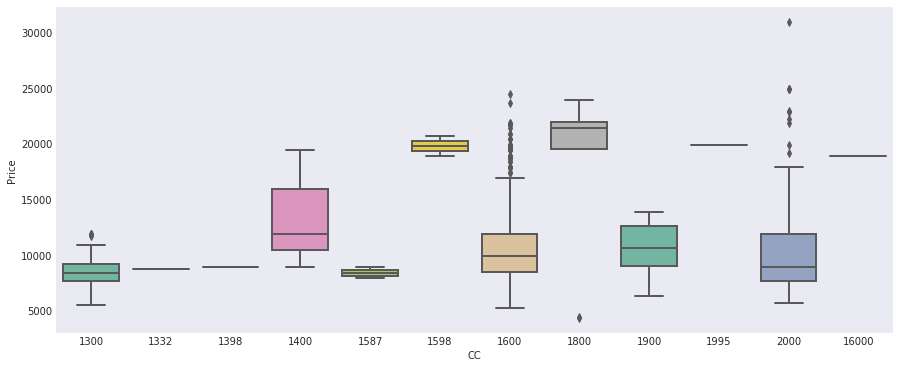

In [21]:
display_boxplot('CC')

# 2. 데이터 분석

## 2.1 실수값 변수 correlation 분석(heatmap)

In [22]:
dfX_real = df_x[cols_real]

In [23]:
df_real = pd.concat([df_y.Price, dfX_real], axis=1)
df_real.head()

,Price,Age_08_04,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,46986,90,210,1165,3
1,13750,23,72937,90,210,1165,3
2,13750,30,38500,90,210,1170,3
3,20950,25,31461,192,100,1185,12
4,19600,25,32189,192,100,1185,3


In [24]:
corrmat = df_real.corr()
corrmat

,Price,Age_08_04,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
Price,1.000000,-0.883900,-0.575962,0.314898,0.178874,0.557015,0.166141
Age_08_04,-0.883900,1.000000,0.516486,-0.164049,-0.172089,-0.463990,-0.166382
KM,-0.575962,0.516486,1.000000,-0.350617,0.289799,-0.011154,-0.136274
HP,0.314898,-0.164049,-0.350617,1.000000,-0.324570,0.078747,0.090731
Quarterly_Tax,0.178874,-0.172089,0.289799,-0.324570,1.000000,0.585494,-0.156661
Weight,0.557015,-0.463990,-0.011154,0.078747,0.585494,1.000000,0.001592
Guarantee_Period,0.166141,-0.166382,-0.136274,0.090731,-0.156661,0.001592,1.000000


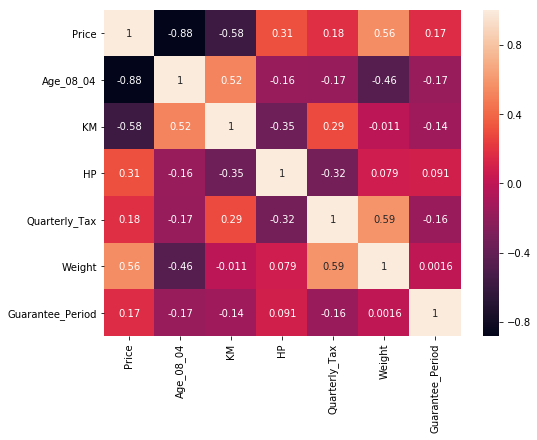

In [25]:
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)

## 2.2 카테고리값 변수 영향력 분석(t, F test)

In [26]:
import scipy.stats as scipystats

### 2.2.1 categorical 변수들 t-test
        - 카테고리 클래스가 (0,1)인 변수들

In [27]:
def T_Test(var):
    tmp_list = df[var].unique()
    print(sp.stats.ttest_ind(df['Price'][df[var] == tmp_list[0]], df['Price'][df[var] == tmp_list[1]]))

In [28]:
cols_cat2 = [ 'Met_Color', 'Automatic', 'Mfr_Guarantee',
               'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',  
               'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 
               'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
               'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

In [29]:
for i in range(len(cols_cat2)):
        print('[',cols_cat2[i],']')
        T_Test(cols_cat2[i])
        print('-'*90)

[ Met_Color ]
Ttest_indResult(statistic=4.9321888011522619, pvalue=9.4929692835439989e-07)
------------------------------------------------------------------------------------------
[ Automatic ]
Ttest_indResult(statistic=-2.175595606130607, pvalue=0.029815204892556121)
------------------------------------------------------------------------------------------
[ Mfr_Guarantee ]
Ttest_indResult(statistic=-5.3359016429594499, pvalue=1.1719842372289647e-07)
------------------------------------------------------------------------------------------
[ BOVAG_Guarantee ]
Ttest_indResult(statistic=1.1333350945458247, pvalue=0.25734065729146599)
------------------------------------------------------------------------------------------
[ ABS ]
Ttest_indResult(statistic=10.190351834509976, pvalue=2.7530011080058277e-23)
------------------------------------------------------------------------------------------
[ Airbag_1 ]
Ttest_indResult(statistic=3.0626046564935661, pvalue=0.0022518974691424407)
-

####        - with boxplot

In [30]:
def five_boxes_and_ttests2(*args):
    
    with plt.style.context(('seaborn-darkgrid')):
        plt.subplots(5, 5, figsize=(15, 12), sharey=True)
        
        for i, arg in enumerate(args):
            tmp_list = df[arg].unique()
            result = sp.stats.ttest_ind(df['Price'][df[arg] == tmp_list[0]], 
                                        df['Price'][df[arg] == tmp_list[1]])
            statistics = result[0]
            pvalue = result[1]

            plt.subplot(5, 5, i+1)
            sns.boxplot(x=df_x[arg], y=df_y['Price'], palette="Set3")
            if pvalue < 0.001:
                plt.title("t : %.4f, p-val : %.4f" % (statistics, pvalue), fontweight = 'bold')
            else:
                plt.title("t : %.4f, p-val : %.4f" % (statistics, pvalue))
            
                
            plt.tight_layout()
            plt.yticks([])

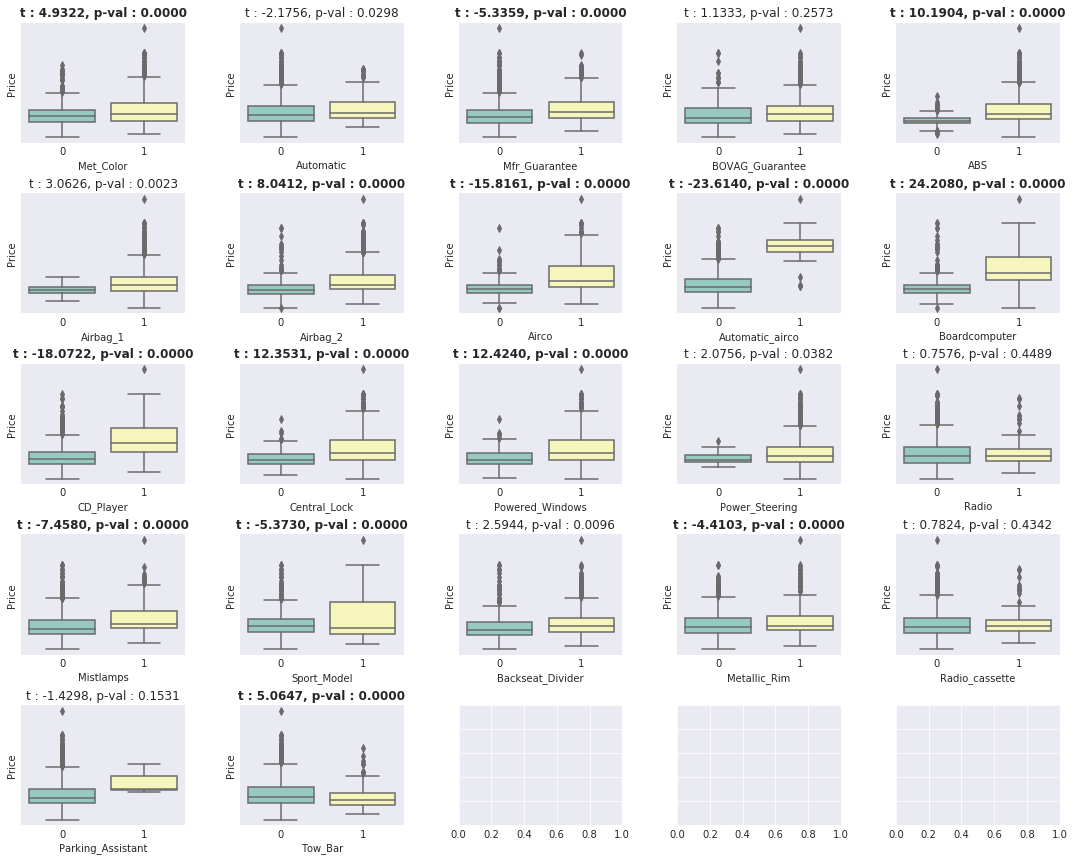

In [31]:
five_boxes_and_ttests2('Met_Color', 'Automatic', 'Mfr_Guarantee',
               'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',  
               'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 
               'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
               'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar')

### 2.2.2 categorical 변수들 F-test
        - 카테고리 클래스가 3개 이상인 변수들

In [32]:
for col in cols_cat:
    tmp_list = df[col].unique()
    if len(tmp_list) > 2:
        print (col, tmp_list)
        print('len : ', len(tmp_list))
    else:
        pass 

Mfg_Month [10  3  8  2  5  9  4  6  7  1 11 12]
len :  12
Mfg_Year [2002 2003 2004 2001 2000 1999 1998]
len :  7
Fuel_Type ['Diesel' 'Petrol' 'CNG']
len :  3
Color ['Blue' 'Silver' 'Black' 'Red' 'Grey' 'Green' 'White' 'Yellow' 'Violet'
 'Beige']
len :  10
CC [ 2000  1800  1600  1400  1598 16000  1995  1900  1300  1398  1332  1587]
len :  12
Doors [3 5 4 2]
len :  4


In [33]:
print(scipystats.f_oneway(df.loc[df["Doors"] == 3].Price,
               df.loc[df["Doors"] == 5].Price,
               df.loc[df["Doors"] == 4].Price,
               df.loc[df["Doors"] == 2].Price))

F_onewayResult(statistic=13.157426161496677, pvalue=1.9673598160670142e-08)


In [34]:
print(scipystats.f_oneway(df.loc[df["Mfg_Month"] == 10].Price,
               df.loc[df["Mfg_Month"] == 3].Price,
               df.loc[df["Mfg_Month"] == 8].Price,
               df.loc[df["Mfg_Month"] == 2].Price,
               df.loc[df["Mfg_Month"] == 5].Price,
               df.loc[df["Mfg_Month"] == 9].Price,
               df.loc[df["Mfg_Month"] == 4].Price,
               df.loc[df["Mfg_Month"] == 6].Price,
               df.loc[df["Mfg_Month"] == 7].Price,
               df.loc[df["Mfg_Month"] == 1].Price,
               df.loc[df["Mfg_Month"] == 11].Price,
               df.loc[df["Mfg_Month"] == 12].Price))

F_onewayResult(statistic=1.5786619529848631, pvalue=0.099474951295375993)


In [35]:
print(scipystats.f_oneway(df.loc[df["Mfg_Year"] == 2002].Price,
               df.loc[df["Mfg_Year"] == 2003].Price,
               df.loc[df["Mfg_Year"] == 2004].Price,
               df.loc[df["Mfg_Year"] == 2001].Price,
               df.loc[df["Mfg_Year"] == 2000].Price,
               df.loc[df["Mfg_Year"] == 1999].Price,
               df.loc[df["Mfg_Year"] == 1998].Price))

F_onewayResult(statistic=917.09097641462085, pvalue=0.0)


In [36]:
print(scipystats.f_oneway(df.loc[df["Fuel_Type"] == 'Diesel'].Price,
               df.loc[df["Fuel_Type"] == 'Petrol'].Price,
               df.loc[df["Fuel_Type"] == 'CNG'].Price))

F_onewayResult(statistic=0.2580949965666503, pvalue=0.77257247583343869)


In [37]:
print(scipystats.f_oneway(df.loc[df["Color"] == 'Blue'].Price,
               df.loc[df["Color"] == 'Silver'].Price,
               df.loc[df["Color"] == 'Black'].Price,
               df.loc[df["Color"] == 'Red'].Price,
               df.loc[df["Color"] == 'Grey'].Price,
               df.loc[df["Color"] == 'Green'].Price,
               df.loc[df["Color"] == 'White'].Price,
               df.loc[df["Color"] == 'Yellow'].Price,
               df.loc[df["Color"] == 'Violet'].Price,
               df.loc[df["Color"] == 'Beige'].Price))

F_onewayResult(statistic=6.4992939839072186, pvalue=4.9278984813640487e-09)


In [38]:
print(scipystats.f_oneway(df.loc[df["CC"] == 2000].Price,
               df.loc[df["CC"] == 1800].Price,
               df.loc[df["CC"] == 1600].Price,
               df.loc[df["CC"] == 1400].Price,
               df.loc[df["CC"] == 1598].Price,
               df.loc[df["CC"] == 16000].Price,
               df.loc[df["CC"] == 1995].Price,
               df.loc[df["CC"] == 1900].Price,
               df.loc[df["CC"] == 1300].Price,
               df.loc[df["CC"] == 1398].Price,
               df.loc[df["CC"] == 1332].Price,
               df.loc[df["CC"] == 1587].Price))

F_onewayResult(statistic=18.817084890556441, pvalue=1.3678616391172345e-34)


# 3. 회귀 분석(OLS)

## 3.1 feature selection 1 (변수 선택법으로 의존적인 변수 삭제)

### 3.1.1 첫 번째 모델 OLS 
- 실수 : Age_08_04 + KM + Weight
- 카테고리 : Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer

- <b><font color="red">          - R-squared : 0.882</font></b>

In [39]:
model_first = sm.OLS.from_formula("Price ~ Age_08_04 + KM + Weight + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     940.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8706.8
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1010   BIC:                         1.748e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3567.9975   1096.376     

### 3.1.2 두 번째 모델 OLS 
- 첫 번째 모델 + 카테고리 변수 'Powered_Windows' 추가

- <b><font color="red">- R-squared : 0.882 (Central_Lock 변수의 p-value가 0.139로 변화)</font></b>

In [40]:
model_second = sm.OLS.from_formula("Price ~ Age_08_04 + KM  + Airco + Weight + Automatic_airco + CD_Player + Central_Lock + Boardcomputer  + Powered_Windows ", data=df)
print(model_second.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     838.5
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8704.8
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1009   BIC:                         1.748e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3484.7224   1095.549     

### 3.1.3 세 번째 모델 OLS 
- 첫 번째 모델 + 카테고리 변수 'CC' 추가
- CC 변수 전처리 필요해보임

- <b><font color="red">- R-squared : 0.887(Boardcomputer 변수의 p-value가 0.247로 변화)</font></b>

In [41]:
model_third = sm.OLS.from_formula("Price ~ Age_08_04 + KM + Weight + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer   + C(CC) + 0 ", data=df)
print(model_third.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     411.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8684.0
No. Observations:                1019   AIC:                         1.741e+04
Df Residuals:                     999   BIC:                         1.751e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(CC)[1300]      3661.1817   1325.101     

### 3.1.4 네 번째 모델 OLS 
- 세 번째 모델  + 카테고리 변수 'Boardcomputer' 제거
- CC 변수 전처리 필요해보임

- <b><font color="red">- R-squared : 0.887</font></b>

In [42]:
model_fourth = sm.OLS.from_formula("Price ~ Age_08_04 + KM + Weight + Airco + Automatic_airco + CD_Player + Central_Lock + C(CC) + 0 ", data=df)
print(model_fourth.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     434.4
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8684.7
No. Observations:                1019   AIC:                         1.741e+04
Df Residuals:                    1000   BIC:                         1.750e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(CC)[1300]      3410.6908   1307.533     

### 3.1.5 다섯 번째 모델 OLS 
- 네 번째 모델 + 'CC' 데이터 전처리
- 전처리 효과는 보았지만 R-squared 값이 내려감
- <b><font color="red">- R-squared : 0.881</font></b>

#### - CC 데이터 전처리

In [43]:
df_CC = df
#1차 그룹핑
df_CC['CC'] = df['CC'].replace(1332,1300)
df_CC['CC'] = df['CC'].replace(1398,1400)
df_CC['CC'] = df['CC'].replace(1598,1600)
df_CC['CC'] = df['CC'].replace(1587,1600)
df_CC['CC'] = df['CC'].replace(1995,2000)
df_CC['CC'] = df['CC'].replace(16000,1600)

#2차 그룹핑
df_CC['CC'] = df['CC'].replace(1300,1400)
df_CC['CC'] = df['CC'].replace(1800,2000)
df_CC['CC'] = df['CC'].replace(1900,2000)

In [44]:
model_fifth = sm.OLS.from_formula("Price ~ Age_08_04 + KM + Weight + Airco + Automatic_airco + CD_Player + Central_Lock   + C(CC) + 0 ", data=df_CC)
print(model_fifth.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     831.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8708.7
No. Observations:                1019   AIC:                         1.744e+04
Df Residuals:                    1009   BIC:                         1.749e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(CC)[1400]      2828.5613   1299.734     

## 3.2 feature selection 2 (정규화)

### 3.2.1 첫 번째 모델 OLS 진단
- 실수 : (scaled)Age_08_04 + (scaled)KM + (scaled)Weight
- 카테고리 : Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer

- <b><font color="red">          - R-squared : 0.882(Cond. Num : 7.46)</font></b>

In [45]:
model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(KM) + scale(Weight) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(model_first.fit().summary())
result = model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     940.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:18   Log-Likelihood:                -8706.8
No. Observations:                1019   AIC:                         1.743e+04
Df Residuals:                    1010   BIC:                         1.748e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.016e+04     75.305  

#### 3.2.1.1 잔차 정규성 분석
   - <b><font color="red"> - p-value : 0.000으로 잔차의 정규성이 기각됨</font></b>

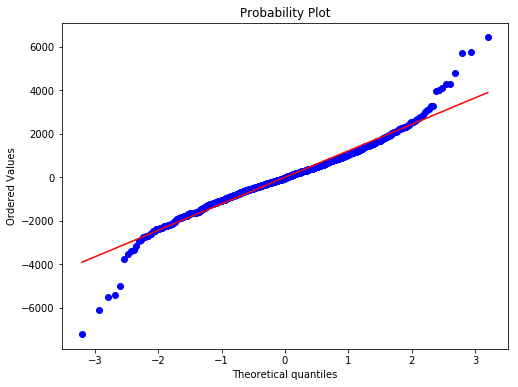

Chi^2       : 100.128
P-value     :  0.000


In [46]:
#잔차정규성 그래프
plt.figure(figsize=(8, 6))
sp.stats.probplot(result.resid, plot=plt)
plt.show()
#잔차 정규성 P-value
test = sms.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

#### 3.2.1.2 다중공선성 분석

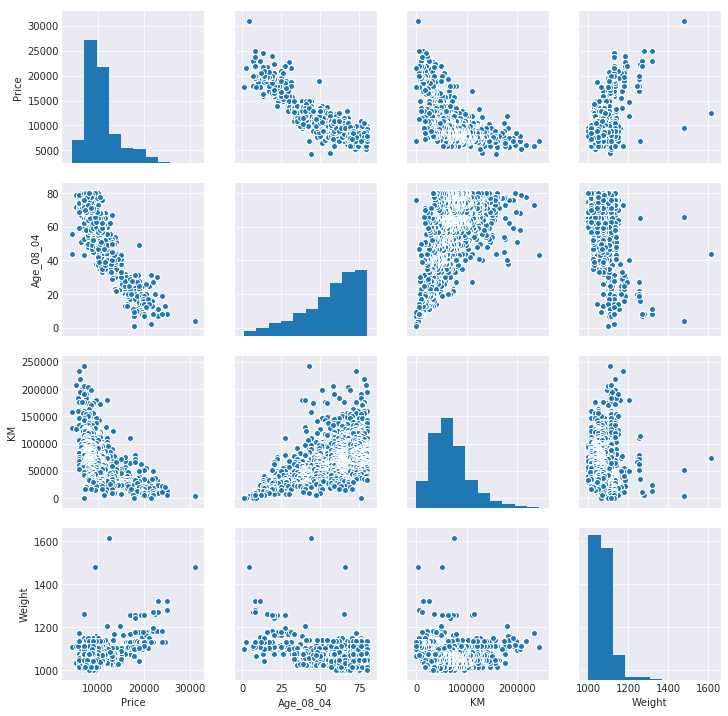

In [47]:
df_x = df.iloc[:, 3:]

model_first_df= [ 'Age_08_04' , 'KM' , 'Weight' ]
df_y = df.iloc[:, :3]

dfX_first = df_x[model_first_df]

with plt.style.context(('seaborn-darkgrid')):
    sns_plot = sns.pairplot(pd.concat([df_y.Price, dfX_first], axis=1) ,size=2.5)

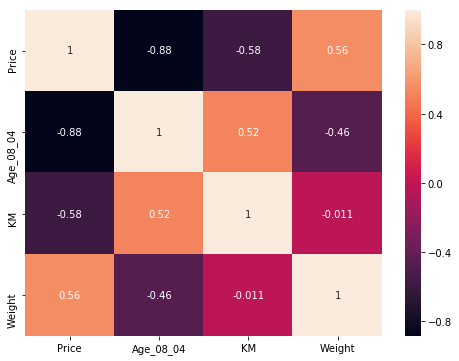

In [48]:
df_first = pd.concat([df_y.Price, dfX_first], axis=1)
corrmat = df_first.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, annot=True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

first_model = [ 'Age_08_04' , 'KM' , 'Airco', 'Weight', 'Automatic_airco' , 'CD_Player' , 'Central_Lock' , 'Boardcomputer']
dfX_first_1 = df_x[first_model]


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX_first_1.values, i) for i in range(dfX_first_1.shape[1])]
vif["features"] = dfX_first_1.columns
vif

,VIF Factor,features
0,24.151441,Age_08_04
1,5.937446,KM
2,3.304098,Airco
3,31.734911,Weight
4,1.400792,Automatic_airco
5,1.910054,CD_Player
6,3.488916,Central_Lock
7,2.902599,Boardcomputer


<b><font color="red">'Weight'의 VIF가 31.73으로 높다<br>
--> 'Weight' 변수 제거</font></b>

In [50]:
first_model2 = [ 'Age_08_04' , 'KM' , 'Airco' , 'Automatic_airco' , 'CD_Player' , 'Central_Lock' , 'Boardcomputer']

dfX_first_2 = df_x[first_model2]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX_first_2.values, i) for i in range(dfX_first_2.shape[1])]
vif["features"] = dfX_first_2.columns
vif

,VIF Factor,features
0,6.359601,Age_08_04
1,5.870228,KM
2,3.107320,Airco
3,1.249519,Automatic_airco
4,1.834762,CD_Player
5,3.419162,Central_Lock
6,2.047333,Boardcomputer


### -'Weight'변수 제거 후 OLS

In [51]:
model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(model_first.fit().summary())
result = model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     878.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:21   Log-Likelihood:                -8796.7
No. Observations:                1019   AIC:                         1.761e+04
Df Residuals:                    1011   BIC:                         1.765e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.008e+04     81.976  

In [133]:
model_first = sm.OLS.from_formula( "Price ~ scale(np.log(Age_08_04)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(model_first.fit().summary())
result = model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     850.5
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:26:18   Log-Likelihood:                -8810.6
No. Observations:                1019   AIC:                         1.764e+04
Df Residuals:                    1011   BIC:                         1.768e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [136]:
model_first = sm.OLS.from_formula( "Price ~ scale(np.log(Age_08_04)) + scale(np.log(KM)) + Airco + Automatic_airco + CD_Player + Central_Lock  + Boardcomputer", data=df)
print(model_first.fit().summary())
result = model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     718.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:27:20   Log-Likelihood:                -8882.9
No. Observations:                1019   AIC:                         1.778e+04
Df Residuals:                    1011   BIC:                         1.782e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 3.2.1.3 Partial Regression Plot 작성(다항성)

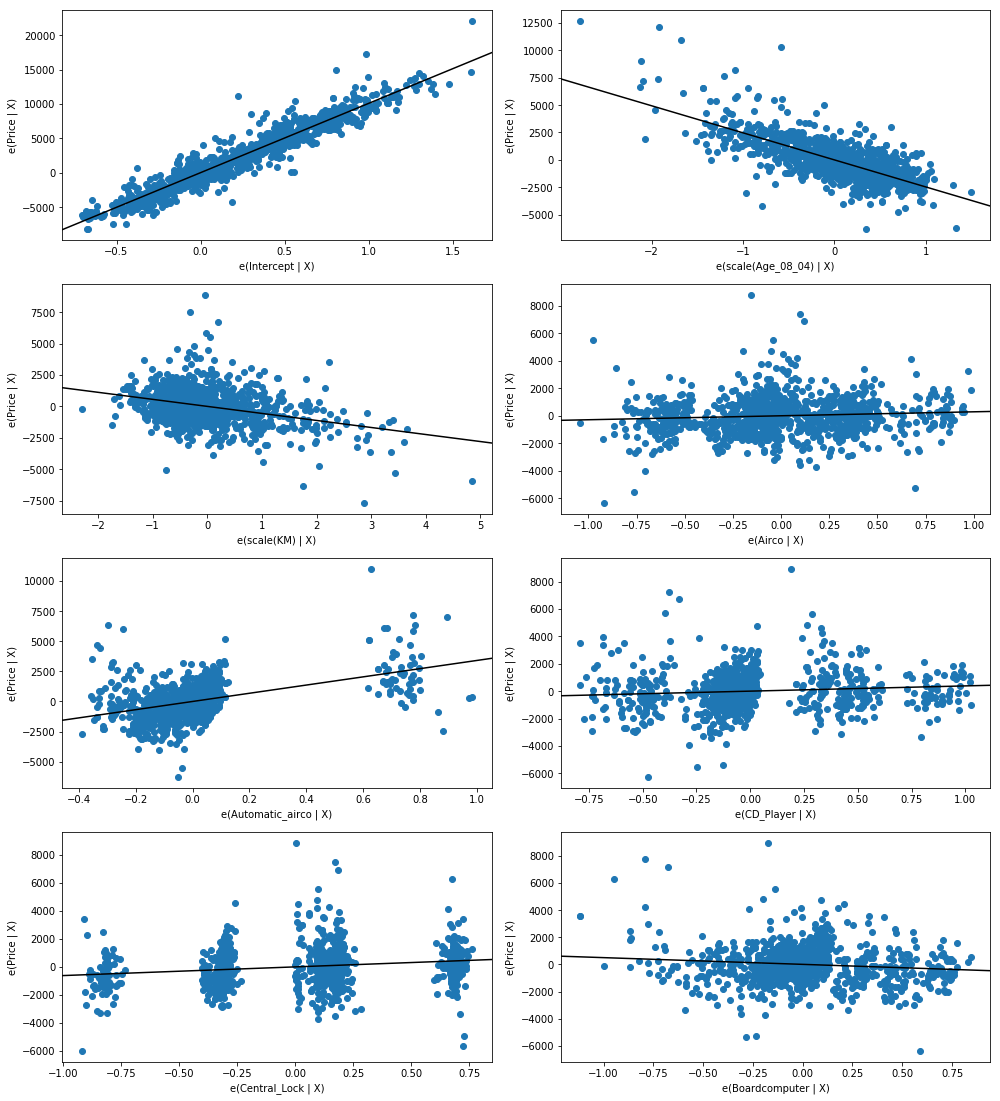

In [53]:
fig_partial = plt.figure(figsize=(14,16))
sm.graphics.plot_partregress_grid(result, fig=fig_partial)
fig_partial.suptitle("")
plt.show()

#### 3.2.1.4 CCPR 작성

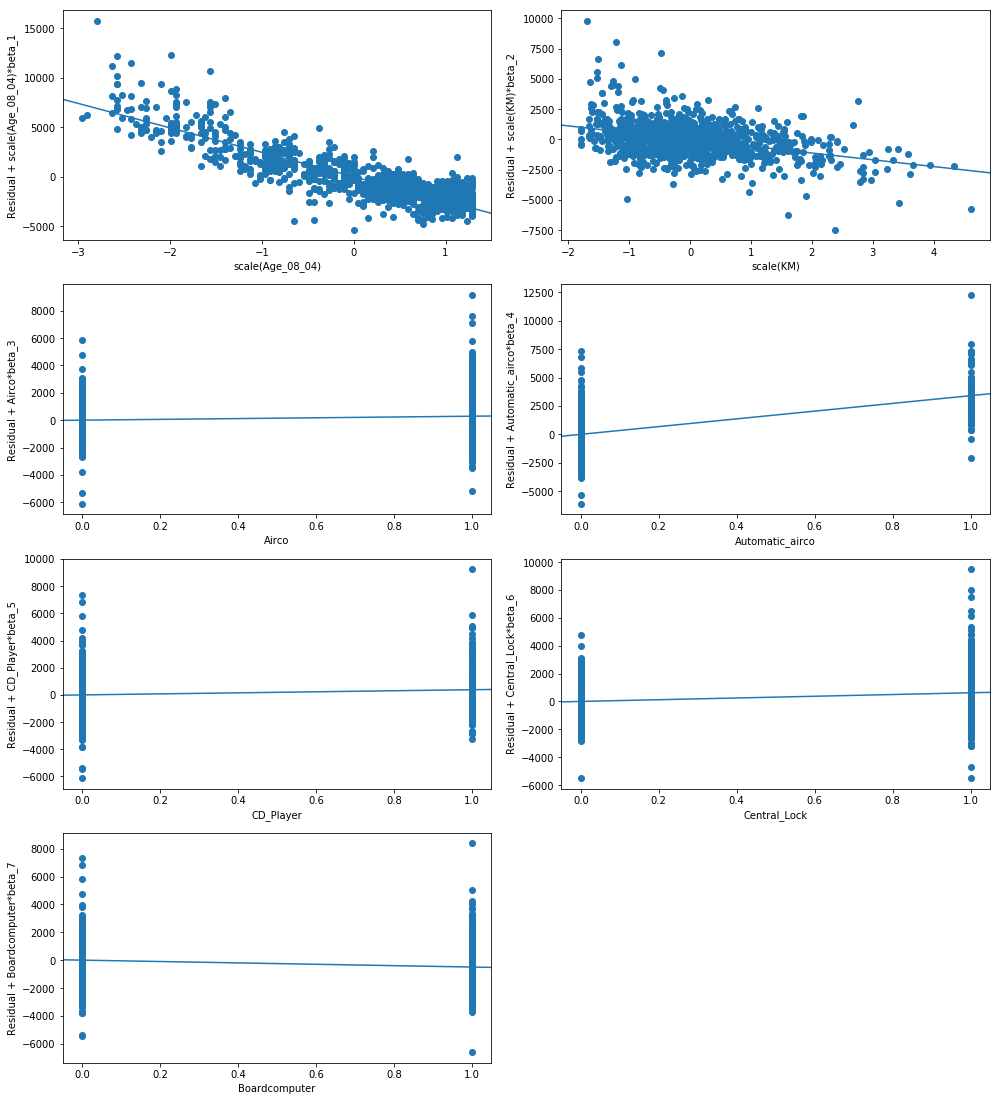

In [54]:
fig_ccpr = plt.figure(figsize=(14,16))
sm.graphics.plot_ccpr_grid(result, fig=fig_ccpr)
fig_ccpr.suptitle("")
plt.show()

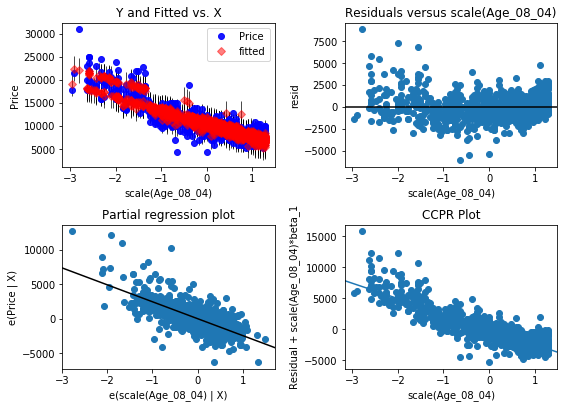

In [55]:
# "Age_08_04" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "scale(Age_08_04)", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

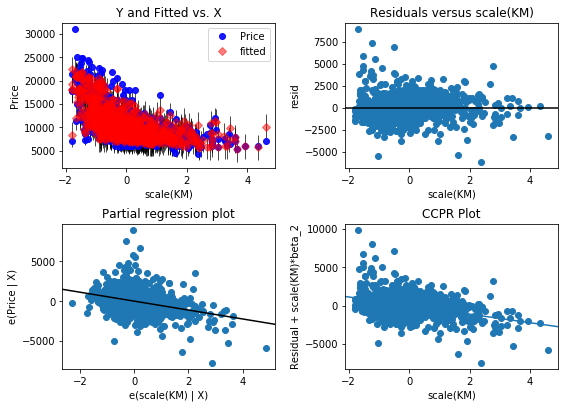

In [56]:
# "KM" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "scale(KM)", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

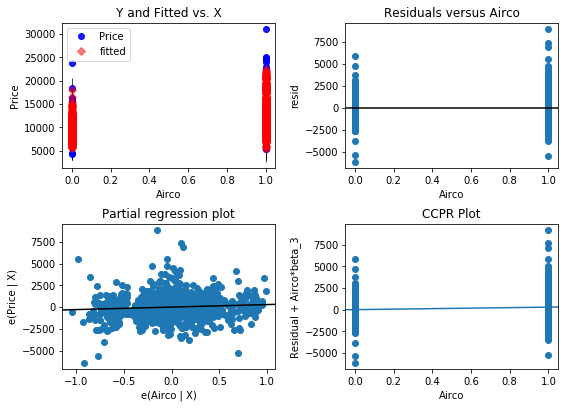

In [57]:
# "Airco" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "Airco", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

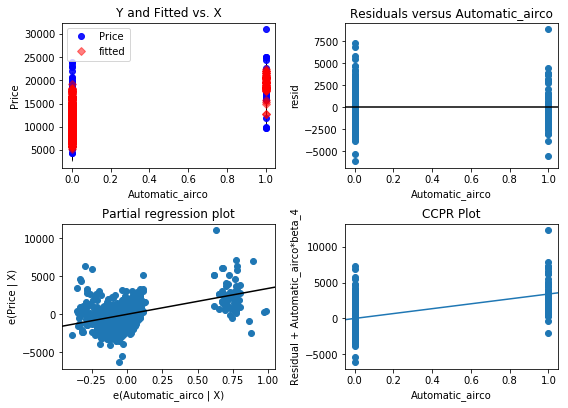

In [58]:
# "Automatic_airco" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "Automatic_airco", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

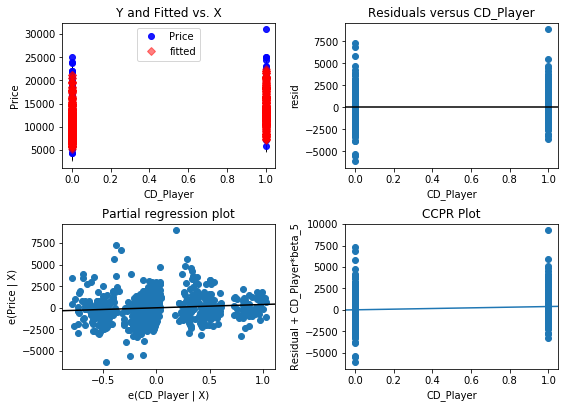

In [59]:
# "CD_Player" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "CD_Player", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

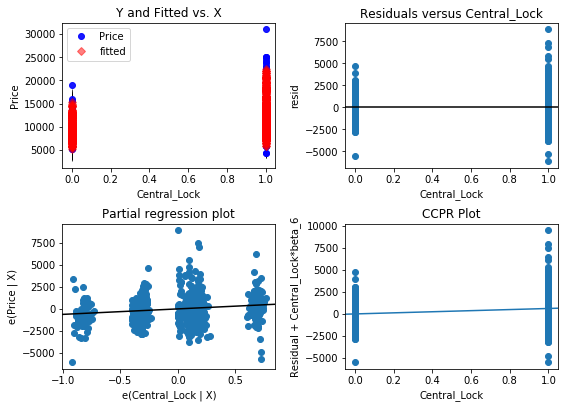

In [60]:
# "Central_Lock" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "Central_Lock", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

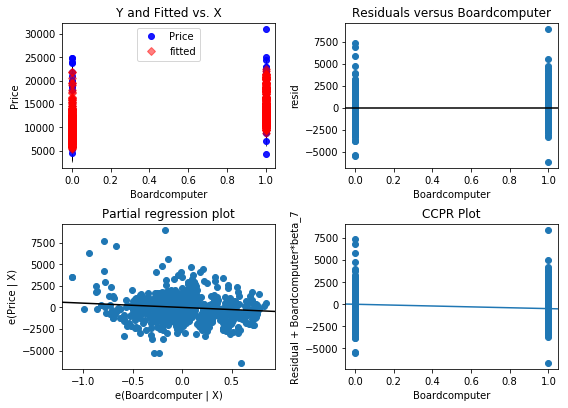

In [61]:
# "Boardcomputer" Plot_regress_exog
fig_exog = plt.figure(figsize=(8,6))
sm.graphics.plot_regress_exog(result, "Boardcomputer", fig=fig_exog)
fig_exog.suptitle("")
plt.show()

### 3.2.2 실수값 변수의 다항회귀 (차수 결정)

### $y$ = $Age$ + $KM$ + $KM^2$ +  $Cats.$

In [62]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04)  + scale(KM) +  scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     767.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8796.6
No. Observations:                1019   AIC:                         1.761e+04
Df Residuals:                    1010   BIC:                         1.766e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.008e+04     82.01

### $y$ = $Age$ + $KM$ + $KM^2$ + $KM^3$ +  $Cats.$

In [63]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(KM) +  scale(I(KM**2)) + scale(I(KM**3)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     692.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8790.1
No. Observations:                1019   AIC:                         1.760e+04
Df Residuals:                    1009   BIC:                         1.765e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.007e+04     81.54

### $y$ = $Age$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$ +  $Cats.$

In [64]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(KM) +  scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     622.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8790.0
No. Observations:                1019   AIC:                         1.760e+04
Df Residuals:                    1008   BIC:                         1.766e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.007e+04     81.62

### $y$ = $Age$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$ + $KM^5$ +  $Cats.$

In [65]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + scale(I(KM**5)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     565.4
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8789.8
No. Observations:                1019   AIC:                         1.760e+04
Df Residuals:                    1007   BIC:                         1.766e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.007e+04     81.66

### $y$ = $Age$ + $Age^2$ + $KM$  +  $Cats.$

In [66]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(KM)  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     897.6
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8727.5
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1010   BIC:                         1.752e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $KM$ + $KM^2$ +  $Cats.$

In [67]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(KM) + scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     806.2
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8722.4
No. Observations:                1019   AIC:                         1.746e+04
Df Residuals:                    1009   BIC:                         1.751e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$

In [68]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     907.6
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8722.5
No. Observations:                1019   AIC:                         1.746e+04
Df Residuals:                    1010   BIC:                         1.751e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$ - $CD Player$

In [69]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1032.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8725.2
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1011   BIC:                         1.751e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$ - $CD Player$ - $Boardcomputer$

In [70]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + Central_Lock", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1197.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8728.5
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1012   BIC:                         1.751e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$ - $CD Player$ - $Boardcomputer$ - $Airco$

In [71]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2)) + Automatic_airco + Central_Lock", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1408.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8737.7
No. Observations:                1019   AIC:                         1.749e+04
Df Residuals:                    1013   BIC:                         1.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Automaticairco$

In [72]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2)) + Automatic_airco", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1644.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:28   Log-Likelihood:                -8768.2
No. Observations:                1019   AIC:                         1.755e+04
Df Residuals:                    1014   BIC:                         1.757e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$

In [73]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1794.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8855.8
No. Observations:                1019   AIC:                         1.772e+04
Df Residuals:                    1015   BIC:                         1.774e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $KM$ + $KM^2$ + $KM^3$ +  $Cats.$

In [74]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     724.9
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8722.4
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1008   BIC:                         1.752e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$ +  $Cats.$

In [75]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     658.9
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8722.0
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1007   BIC:                         1.753e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$ + $KM^5$ +  $Cats.$

In [76]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + scale(I(KM**5)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     604.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8721.6
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1006   BIC:                         1.753e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$+ $KM$ +  $Cats.$

In [77]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     797.2
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8727.4
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1009   BIC:                         1.752e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$+ $KM$ + $KM^2$ +  $Cats.$

In [78]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(KM) + scale(I(KM**2)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     725.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8722.3
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1008   BIC:                         1.752e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$+ $KM$ + $KM^2$ + $KM^3$ +  $Cats.$

In [79]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     658.5
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8722.3
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1007   BIC:                         1.753e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$+ $KM$ + $KM^2$ + $KM^3$ + $KM^4$ +  $Cats.$

In [80]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     603.5
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8721.9
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1006   BIC:                         1.753e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$+ $KM$ + $KM^2$ + $KM^3$ + $KM^4$ + $KM^5$ +  $Cats.$

In [81]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + scale(I(KM**5)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     557.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:29   Log-Likelihood:                -8721.5
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1005   BIC:                         1.754e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $KM$ +  $Cats.$

In [82]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     717.4
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8727.0
No. Observations:                1019   AIC:                         1.748e+04
Df Residuals:                    1008   BIC:                         1.753e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $KM$ + $KM^2$ +  $Cats.$

In [83]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(KM) + scale(I(KM**2)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     658.6
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8722.2
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1007   BIC:                         1.753e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $KM$ + $KM^2$ + $KM^3$ +  $Cats.$

In [84]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     603.2
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8722.2
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1006   BIC:                         1.753e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $KM$ + $KM^2$ + $KM^3$ + $KM^4$ +  $Cats.$

In [85]:
rev_model_first = sm.OLS.from_formula("Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4))+ scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     556.7
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8721.8
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1005   BIC:                         1.754e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $KM$ + $KM^2$ + $KM^3$ + $KM^4$ + $KM^5$ +  $Cats.$

In [86]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + scale(I(KM**5)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     516.9
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8721.4
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1004   BIC:                         1.755e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $Age^5$ + $KM$+  $Cats.$

In [87]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(I(Age_08_04**5)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     654.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8725.3
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1007   BIC:                         1.753e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $Age^5$ + $KM$ + $KM^2$ +  $Cats.$

In [88]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(I(Age_08_04**5)) + scale(KM) + scale(I(KM**2)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     605.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8720.6
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1006   BIC:                         1.753e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $Age^5$ + $KM$ + $KM^2$ + $KM^3$ +  $Cats.$

In [89]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(I(Age_08_04**5)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     558.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -8720.5
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1005   BIC:                         1.754e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $Age^5$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$+  $Cats.$

In [90]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(I(Age_08_04**5)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     518.3
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8720.2
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1004   BIC:                         1.754e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $Age^2$ + $Age^3$ + $Age^4$+ $Age^5$ + $KM$ + $KM^2$ + $KM^3$ + $KM^4$ + $KM^5$ +  $Cats.$

In [91]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(Age_08_04**3)) + scale(I(Age_08_04**4)) + scale(I(Age_08_04**5)) + scale(KM) + scale(I(KM**2)) + scale(I(KM**3)) + scale(I(KM**4)) + scale(I(KM**5)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     483.6
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8719.8
No. Observations:                1019   AIC:                         1.747e+04
Df Residuals:                    1003   BIC:                         1.755e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $log(Age)$ + $KM$ +  $Cats.$

In [92]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(np.log(Age_08_04)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     850.5
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8810.6
No. Observations:                1019   AIC:                         1.764e+04
Df Residuals:                    1011   BIC:                         1.768e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $log(Age)$ + $KM$ +  $Cats.$ - $Bc$

### log(Age) KM1 - Bc

In [93]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(np.log(Age_08_04)) + scale(KM) + Airco + Automatic_airco + CD_Player + Central_Lock", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     990.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8811.7
No. Observations:                1019   AIC:                         1.764e+04
Df Residuals:                    1012   BIC:                         1.767e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### $y$ = $Age$ + $log(KM)$ +  $Cats.$

In [94]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(np.log(KM)) + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     797.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8838.3
No. Observations:                1019   AIC:                         1.769e+04
Df Residuals:                    1011   BIC:                         1.773e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.009e+04     85.43

### $y$ = $Age$ + $log(KM)$ +  $Cats.$ - $Airco$

In [95]:
rev_model_first = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(np.log(KM)) + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=df)
print(rev_model_first.fit().summary())
result = rev_model_first.fit()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     928.4
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:31   Log-Likelihood:                -8839.9
No. Observations:                1019   AIC:                         1.769e+04
Df Residuals:                    1012   BIC:                         1.773e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.013e+04     81.99

# 4. leverage, outlier 탐색 

In [96]:
df_x_c_0 = sm.add_constant(df_x[cols_real[0]])
df_x_c_1 = sm.add_constant(df_x[cols_real[1]])
df_y_price = pd.DataFrame(df_y, columns=["Price"])

In [97]:
model0 = sm.OLS(pd.DataFrame(df_y_price), pd.DataFrame(df_x_c_0))
result0 = model0.fit()

model1 = sm.OLS(pd.DataFrame(df_y_price), pd.DataFrame(df_x_c_1))
result1 = model1.fit()

In [98]:
influence0 = result0.get_influence()
hat0 = influence0.hat_matrix_diag

influence1 = result1.get_influence()
hat1 = influence1.hat_matrix_diag

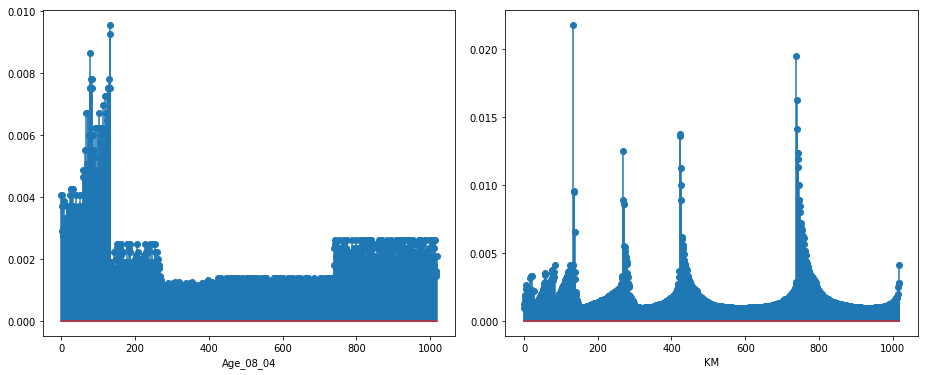

In [99]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.stem(hat0)
plt.xlabel(cols_real[0])

plt.subplot(2, 2, 2)
plt.stem(hat1)
plt.xlabel(cols_real[1])

plt.tight_layout()
plt.show()

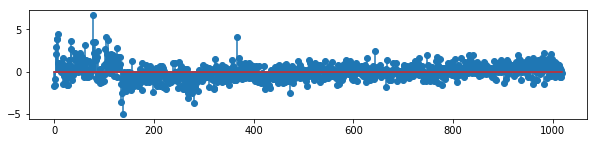

In [100]:
plt.figure(figsize=(10, 2))
plt.stem(result0.resid_pearson)
plt.show()

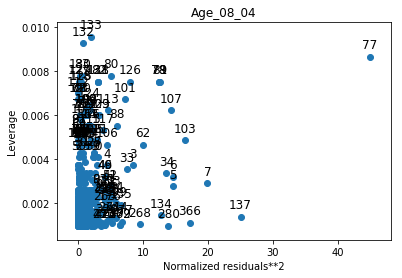

In [101]:
sm.graphics.plot_leverage_resid2(result0)
plt.title(cols_real[0])
plt.show()

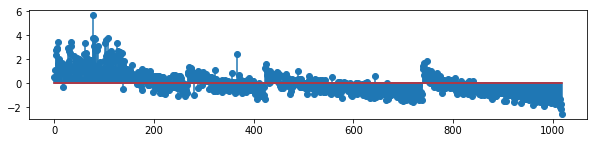

In [102]:
plt.figure(figsize=(10, 2))
plt.stem(result1.resid_pearson)
plt.show()

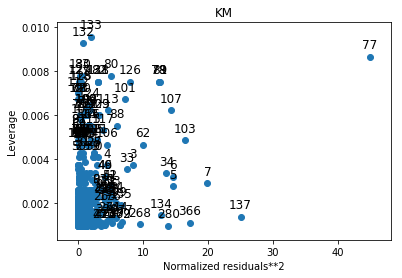

In [103]:
sm.graphics.plot_leverage_resid2(result0)
plt.title(cols_real[1])
plt.show()

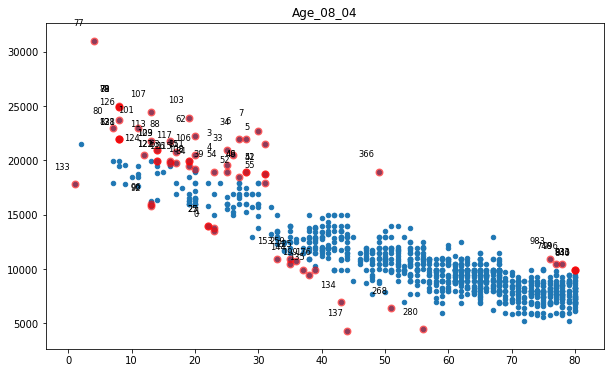

69


In [104]:
from statsmodels.graphics import utils
plt.figure(figsize=(10, 6))

influence = result0.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df_y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

df_y_price = np.hstack([df_y.Price])
df_y_price_stacked = np.hstack([df_y_price])

ax = plt.subplot()
plt.scatter(df_x[cols_real[0]], df_y_price_stacked, s=20)
plt.scatter(df_x[cols_real[0]][idx], df_y_price[idx], s=50, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(df_x[cols_real[0]][idx], df_y_price[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title(cols_real[0])

ng_Age = idx
plt.show()

print(len(ng_Age))

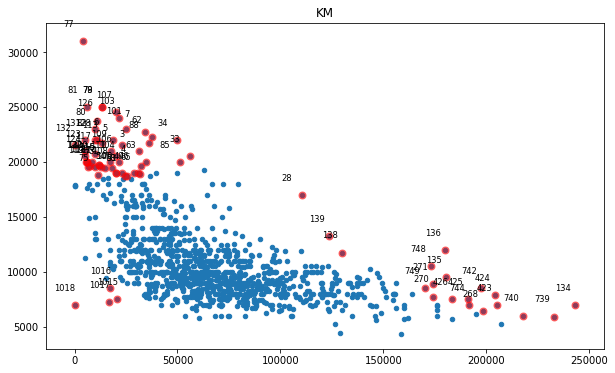

76


In [105]:
from statsmodels.graphics import utils
plt.figure(figsize=(10, 6))

influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df_y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

df_y_price = np.hstack([df_y.Price])
df_y_price_stacked = np.hstack([df_y_price])

ax = plt.subplot()
plt.scatter(df_x[cols_real[1]], df_y_price_stacked, s=20)
plt.scatter(df_x[cols_real[1]][idx], df_y_price[idx], s=50, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(df_x[cols_real[1]][idx], df_y_price[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.title(cols_real[1])

ng_KM = idx
plt.show()

print(len(ng_KM))

In [106]:
np.shape(ng_Age)

(69,)

In [107]:
np.shape(ng_KM)

(76,)

In [108]:
stacked_ng = np.union1d(ng_Age, ng_KM)
len(stacked_ng)

102

In [109]:
stacked_ng[7]

25

In [110]:
list_stacked_ng = list(stacked_ng)

In [111]:
rev_df = df
rev_df = rev_df.drop(list_stacked_ng, 0)
    
len(rev_df)

917

## 4.1 leverage, outlier 제거 후 OLS

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$

In [112]:
rev_model = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=rev_df)
print(rev_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     646.8
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:42   Log-Likelihood:                -7639.5
No. Observations:                 917   AIC:                         1.530e+04
Df Residuals:                     908   BIC:                         1.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [138]:
rev_model = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", data=rev_df)
print(rev_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     710.9
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:29:16   Log-Likelihood:                -7655.1
No. Observations:                 917   AIC:                         1.533e+04
Df Residuals:                     909   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$ - $CDplayer$

In [113]:
rev_model = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))  + Airco + Automatic_airco + Central_Lock + Boardcomputer", data=rev_df)
print(rev_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     733.0
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:42   Log-Likelihood:                -7643.2
No. Observations:                 917   AIC:                         1.530e+04
Df Residuals:                     909   BIC:                         1.534e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$

In [114]:
rev_model = sm.OLS.from_formula( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))+ scale(I(KM**2))", data=rev_df)
print(rev_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1426.
Date:                Tue, 24 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:21:42   Log-Likelihood:                -7714.6
No. Observations:                 917   AIC:                         1.544e+04
Df Residuals:                     913   BIC:                         1.546e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# 5. 정규화 및 교차검증(K-fold)

In [115]:
from sklearn.model_selection import KFold

## 5.1 최종모델1 : <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$

In [116]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", rev_df , return_type = 'dataframe' )

#poly = PolynomialFeatures(1)
model1_LR = make_pipeline(LinearRegression()).fit(X, y)
model1_ridge = make_pipeline(Ridge()).fit(X, y)
model1_lasso = make_pipeline(Lasso()).fit(X, y)
model1_EN = make_pipeline(ElasticNet()).fit(X, y)
                
cv = KFold(5 , shuffle=True)
#cross_val_score(model1_LR, X, y, scoring="neg_mean_squared_error", cv=cv)
print('[Ridge]')
print('score : ', cross_val_score(model1_ridge, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model1_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model1_lasso, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model1_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model1_EN, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model1_EN, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model1_EN, X, y, scoring="neg_mean_squared_error", cv=cv)))

[Ridge]
score :  [-1165897.64883043  -875367.67619142 -1228277.22641714 -1062102.20379133
  -837953.48242795] 
 mean :  -1032892.24661 
 std :  97794.8060532

[Lasso]
score :  [-1132070.80579304 -1002528.52413132 -1231546.30567731 -1065585.89790965
  -738240.41735178] 
 mean :  -1038695.77763 
 std :  34483.2616591

[Elastic-net]
score :  [-1503356.2654326  -1729226.18459304 -1288796.08020387 -1331168.70226546
 -1495738.64456251] 
 mean :  -1465693.14202 
 std :  83045.1699463


##  5.1.1 최종모델의 하이퍼 모수

In [118]:
shuffled_rev_df = rev_df.sample(frac=1).reset_index(drop=True)
shuffled_rev_df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1148,TOYOTA Corolla 1.3 Linea Terra 3 drs 2/3-Doors,7950,80,1,1998,102300,Petrol,86,1,Blue,0,1400,3,4,5,69,1015,0,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,430,TOYOTA Corolla 1.6 VVT-i L. Sol Wagon Stationw...,12500,54,3,2000,84598,Petrol,110,0,Red,0,1600,5,4,5,19,1075,0,1,6,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,1
2,945,TOYOTA Corolla 1.6 16V HATCHB LINEA LUNA 2/3-D...,9250,61,8,1999,54000,Petrol,110,1,Red,0,1600,3,4,5,85,1055,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,0,1,0,0,0,1
3,1095,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,7250,77,4,1998,128960,Petrol,110,1,Red,0,1600,5,4,5,85,1070,0,1,3,0,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,0,1
4,206,TOYOTA Corolla 19D LB Linea Terra 4/5-Doors,12950,43,2,2001,89968,Diesel,69,1,Green,0,2000,5,4,5,185,1140,0,0,3,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0
5,672,TOYOTA Corolla 1.6 HB LINEA LUNA AUT 2/3-Doors,9750,64,5,1999,106784,Petrol,110,0,Blue,1,1600,3,4,5,19,1050,0,1,12,1,1,0,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0
6,1209,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,6950,73,8,1998,88186,Diesel,72,1,Blue,0,2000,3,4,5,185,1115,0,1,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
7,648,TOYOTA Corolla 2.0 DSL WAGON LINEA TERRA Stati...,9950,64,5,1999,118000,Diesel,72,1,Grey,0,2000,5,4,5,185,1150,0,1,3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1
8,639,TOYOTA Corolla 2.0 DSL HATCHB LINEA TERRA 2/3-...,8750,68,1,1999,125000,Diesel,72,1,Green,0,2000,3,4,5,185,1115,0,1,3,1,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0
9,1212,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,6750,75,6,1998,87613,Petrol,86,0,Grey,0,1400,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.316227766017


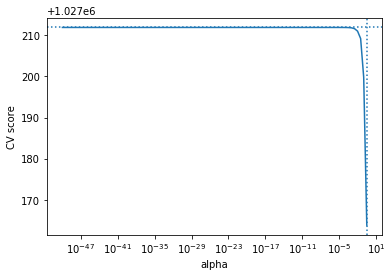

In [119]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LassoCV , RidgeCV , ElasticNetCV


y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", shuffled_rev_df, return_type = 'dataframe' )
#X_1 = X[:500]
#y_1 = y[:500]


alphas = np.logspace(-50, -.5, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

print(lasso_cv.alpha_ )

scores = lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

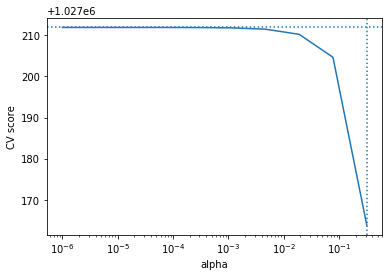

0.316227766017


In [120]:
from sklearn.cross_validation import cross_val_score,cross_val_predict,ShuffleSplit,KFold

y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))  + scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", shuffled_rev_df, return_type = 'dataframe' )

model = Lasso()
alphas = np.logspace(-6, -.5, 10)

scores = list()

for alpha in alphas:
    model.alpha = alpha
    this_scores = -cross_val_score(model, X, y, "neg_mean_squared_error", cv=5)
    scores.append(np.mean(this_scores))

plt.semilogx(alphas, scores)
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle=':')
plt.axvline(lasso_cv.alpha_ , linestyle=':')
plt.show()

print(lasso_cv.alpha_ )

#


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.517947467923


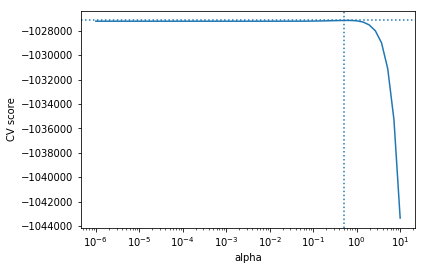

In [121]:
from sklearn.linear_model import RidgeCV, LassoCV
y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2))  + scale(I(KM**2))  + Airco + Automatic_airco + CD_Player + Central_Lock + Boardcomputer", shuffled_rev_df, return_type = 'dataframe' )

alphas = np.logspace(-6, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

print(lasso_cv.alpha_ )

scores = -lasso_cv.mse_path_.mean(axis=1)
plt.semilogx(lasso_cv.alphas_, scores)
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


10.0


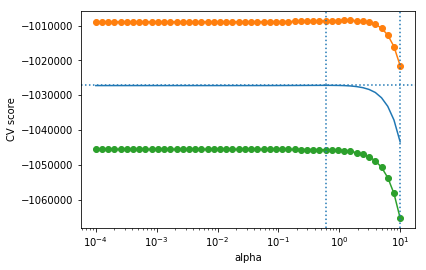

In [122]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X, y)

scores = -lasso_cv.mse_path_.mean(axis=1)
scores_std = lasso_cv.mse_path_.std(axis=1)
scores_std1 = scores + scores_std / np.sqrt(len(lasso_cv.mse_path_))
scores_std2 = scores - scores_std / np.sqrt(len(lasso_cv.mse_path_))

alpha_1se = lasso_cv.alphas_[np.argmax(scores_std1 > np.max(scores))]
print(alpha_1se)

plt.semilogx(lasso_cv.alphas_, scores)
plt.semilogx(lasso_cv.alphas_, scores_std1, 'o-')
plt.semilogx(lasso_cv.alphas_, scores_std2, 'o-')
plt.axhline(np.max(scores), linestyle=':')    
plt.axvline(lasso_cv.alpha_ , linestyle=':')   
plt.axvline(alpha_1se, linestyle=':')   
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [124]:
scores

array([-1043358.84549158, -1037075.74793621, -1033154.23941224,
       -1030705.53847543, -1029193.4969293 , -1028328.04686586,
       -1027816.25535404, -1027508.15985789, -1027321.27596788,
       -1027220.84271293, -1027171.32709371, -1027150.96308065,
       -1027146.24194435, -1027150.17597107, -1027157.61180631,
       -1027166.64347525, -1027175.42603288, -1027183.47308827,
       -1027190.49542466, -1027196.54062898, -1027201.63766464,
       -1027205.80979857, -1027207.30252733, -1027208.14808417,
       -1027208.85350336, -1027209.43712804, -1027209.91494547,
       -1027210.3020068 , -1027210.61610501, -1027210.86718541,
       -1027211.06919983, -1027211.22968815, -1027211.35817796,
       -1027211.45987856, -1027211.54105898, -1027211.60516918,
       -1027211.65625022, -1027211.69653428, -1027211.72859512,
       -1027211.75385757, -1027211.77390283, -1027211.7898051 ,
       -1027211.80232378, -1027211.81225113, -1027211.82012305,
       -1027211.82631784, -1027211.83122

In [129]:
print(len(scores))

50


## 5.2 최종모델2 : <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$ +  $Cats.$ - $CDplayer$

In [130]:
y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(KM**2))  + Airco + Automatic_airco + Central_Lock + Boardcomputer", rev_df , return_type = 'dataframe' )

#poly = PolynomialFeatures(1)
model2_LR = make_pipeline(LinearRegression()).fit(X, y)
model2_ridge = make_pipeline(Ridge()).fit(X, y)
model2_lasso = make_pipeline(Lasso()).fit(X, y)
model2_EN = make_pipeline(ElasticNet()).fit(X, y)
                
cv = KFold(5,shuffle=True)

print('[Ridge]')
print('score : ', cross_val_score(model2_ridge, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model2_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model2_lasso, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model2_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model2_EN, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model2_EN, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model2_EN, X, y, scoring="neg_mean_squared_error", cv=cv)))

[Ridge]
score :  [-4637052.72801294  -612901.49168772 -6069507.67427548] 
 mean :  -3773153.96466 
 std :  2309888.67884

[Lasso]
score :  [ -6008256.96824244  -4674038.60016601 -24718679.81859304] 
 mean :  -11800325.129 
 std :  9150881.5815

[Elastic-net]
score :  [-4735933.5243461   -518981.87791592 -5177294.01998821] 
 mean :  -3477403.14075 
 std :  2099665.3778


## 5.3 최종모델3 : <font color = 'red'>$y$ = $Age$ + $Age^2$ + $KM^2$

In [131]:
y, X = dmatrices( "Price ~ scale(Age_08_04) + scale(I(Age_08_04**2)) + scale(I(KM**2))", rev_df , return_type = 'dataframe' )

#poly = PolynomialFeatures(1)
model3_LR = make_pipeline(LinearRegression()).fit(X, y)
model3_ridge = make_pipeline(Ridge()).fit(X, y)
model3_lasso = make_pipeline(Lasso()).fit(X, y)
model3_EN = make_pipeline(ElasticNet()).fit(X, y)
                
cv = KFold(5,shuffle=True)

print('[Ridge]')
print('score : ', cross_val_score(model3_ridge, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model3_ridge, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Lasso]')
print('score : ', cross_val_score(model3_lasso, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model3_lasso, X, y, scoring="neg_mean_squared_error", cv=cv)))

print('\n[Elastic-net]')
print('score : ', cross_val_score(model3_EN, X, y, scoring="neg_mean_squared_error", cv=cv),'\n',
      'mean : ', np.mean(cross_val_score(model3_EN, X, y, scoring="neg_mean_squared_error", cv=cv)),'\n',
      'std : ', np.std(cross_val_score(model3_EN, X, y, scoring="neg_mean_squared_error", cv=cv)))

[Ridge]
score :  [-6943310.96740992 -5131413.16249524  -929848.56622754] 
 mean :  -4334857.56538 
 std :  2518770.6164

[Lasso]
score :  [ -4960989.18011329 -16033315.67690862   -925553.00570002] 
 mean :  -7306619.28757 
 std :  6386841.09103

[Elastic-net]
score :  [-6996385.77506035 -4730692.78097283  -802646.43117084] 
 mean :  -4176574.99573 
 std :  2558760.98336
